In [10]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, '../topography/')
from utils import infer_topographic_sparse_code, infer_sparse_code

In [11]:
alpha = np.load('../topography/batch_alpha.npy');
filters = np.load('../topography/bases.npy')
patches = np.load('../topography/small.npy')
print(filters.shape)
# print(alpha.shape)
print(patches.shape)

N, H, W, K = alpha.shape;

# Create Correlation Matrix
corr = np.zeros((K, K))

(256, 144)
(10000, 144)


In [17]:
gamma = 5e-4
eta = 10e-0
max_iters = 100
K_sqrt = 16
T_sz = 1
I = patches[0:512]
I = tf.cast(I, tf.float32)
R_tens, hist, loss = infer_topographic_sparse_code(I, filters, gamma, eta, max_iters, T_sz, K_sqrt)

with tf.Session() as sess:
    R, HIST = sess.run([R_tens, hist])
print(R.shape)

(512, 256)


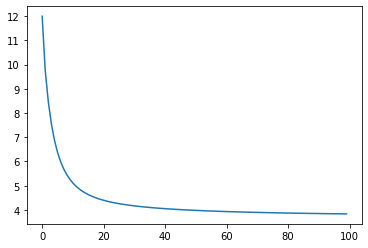

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(HIST)
plt.show()
plt.clf()

(16, 16)
(16, 16, 12, 12)
(12, 12)
[0.0, 0.0, 0.0, 0.9990331, 0.3582808, 0.46749496, 0.23154348]
[0.0022633113, 0.0, 0.0, 0.9990331, 0.792863, 0.63110584, 0.0]


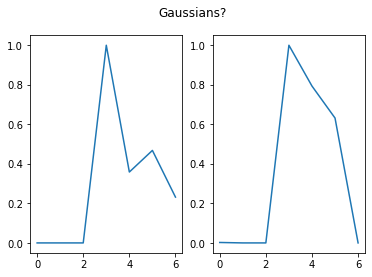

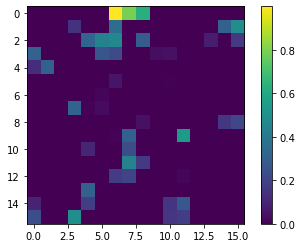

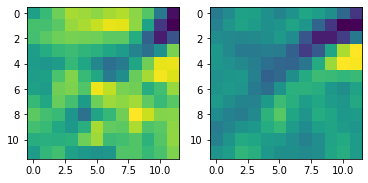


(16, 16)
(16, 16, 12, 12)
(12, 12)
[0.0, 0.16255932, 0.0005509927, 0.45897964, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.11857902, 0.45897964, 0.0018204162, 0.0, 0.0009714966]


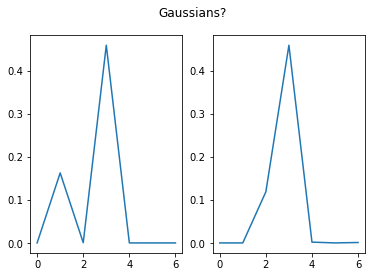

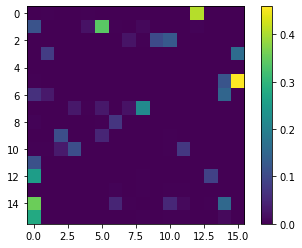

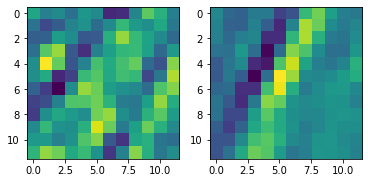


(16, 16)
(16, 16, 12, 12)
(12, 12)
[0.053101026, 0.4083423, 0.9809786, 1.5934716, 0.31457978, 0.0015749519, 0.0]
[0.0, 0.0, 0.0, 1.5934716, 0.0, 0.002084321, 0.17790237]


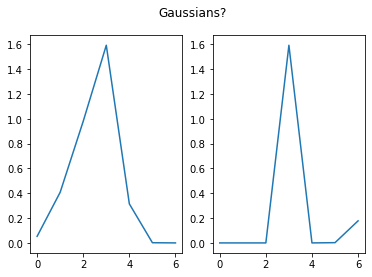

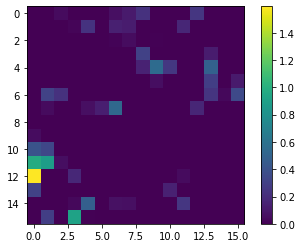

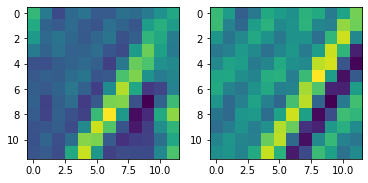


(16, 16)
(16, 16, 12, 12)
(12, 12)
[0.0, 0.0, 0.0, 0.95729655, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.035951737, 0.95729655, 0.059302676, 0.0010794607, 0.0]


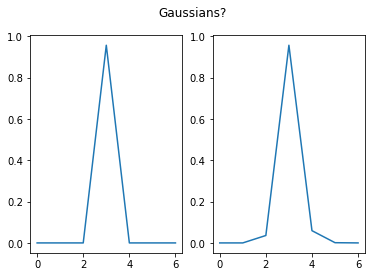

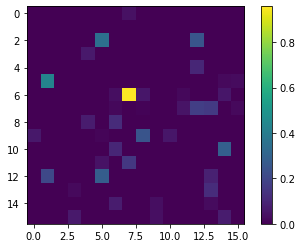

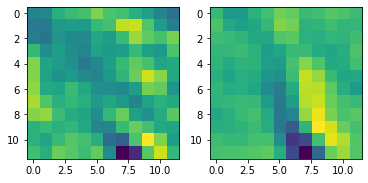


(16, 16)
(16, 16, 12, 12)
(12, 12)
[0.0, 0.0, 0.0, 0.9930877, 0.0, 0.0, 0.0]
[0.25802365, 0.0017989769, 0.48693466, 0.9930877, 0.0, 0.4645989, 0.0]


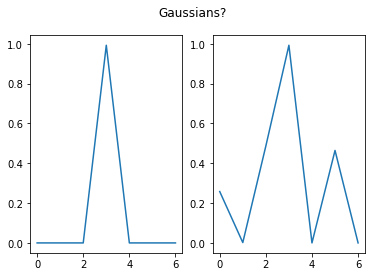

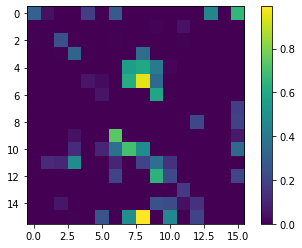

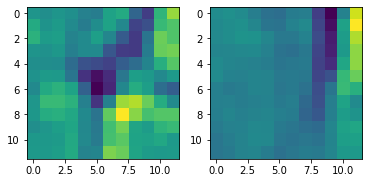

In [ ]:
# length = 3
num_filters_x = 16
num_filters_y = 16
filter_dim_x = 12

filter_dim_y = 12
for i in range(K):
#     print(alpha.shape)
#     A = alpha[i].reshape([-1, K]).T
#     A = np.max(A, axis=1)
    A = R[i].reshape([num_filters_x, num_filters_y])
    print(A.shape)
    F = filters.reshape([num_filters_x, num_filters_y, filter_dim_x, filter_dim_y])
    print(F.shape)
    
    max_val = np.unravel_index(np.argmax(A, axis=None), A.shape)
    
    max_filter = F[max_val[0], max_val[1], :, :]
    print(max_filter.shape)
    
    vertical = []
    horizontal = []
    num_view = length * 2 + 1
    for j in range(num_view):
        x = max_val[0]
        y = max_val[1]
        start_x = x - length
        start_y = y - length
        vertical.append(A[(start_x + j) % num_filters_x, y])
        horizontal.append(A[x, (start_y + j) % num_filters_y])
    print(vertical)
    print(horizontal)
    
    x_axis = np.arange(num_view)
    fig, axs = plt.subplots(1, 2)
    fig.suptitle('Gaussians?')
    axs[0].plot(x_axis, vertical)
    axs[1].plot(x_axis, horizontal)
    plt.show()
    plt.clf()

    plt.imshow(A)
    plt.colorbar()
    plt.show()
    plt.clf()
    
    # Show
    plt.subplot(1,2,1)
    plt.imshow(patches[i].reshape([filter_dim_x, filter_dim_y]))
    
    plt.subplot(1,2,2)
    plt.imshow(max_filter)
    plt.show()
    input()